In [ ]:
import sys
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from tqdm.auto import trange, tqdm
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt
sys.path.append("/n/home12/binxuwang/Github/DiffusionLearningCurve")
sys.path.append("/Users/binxuwang/Github/DiffusionLearningCurve/")
from core.diffusion_nn_lib import UNetBlockStyleMLP_backbone
from core.toy_shape_dataset_lib import generate_random_star_shape_torch
from core.diffusion_basics_lib import *
from core.diffusion_edm_lib import *
from core.img_patch_stats_analysis_lib import *
from core.trajectory_convergence_lib import *
from circuit_toolkit.plot_utils import saveallforms
saveroot = f"/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/DiffusionSpectralLearningCurve"

def get_device():
    if torch.cuda.is_available():
        device = torch.device("cuda")
    elif torch.backends.mps.is_available():
        device = torch.device("mps")
    else:
        device = torch.device("cpu")
    return device

In [6]:
image_tensor = torch.load("/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/DiffusionSpectralLearningCurve/wordnet_render_dataset/words32x32_50k.pt")
text_list = pkl.load(open("/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/DiffusionSpectralLearningCurve/wordnet_render_dataset/words32x32_50k_words.pkl", "rb"))
data_Xtsr = image_tensor
pnts = data_Xtsr.view(data_Xtsr.shape[0], -1).to(device)
pnts = (pnts - 0.5) / 0.5

In [5]:
device = get_device()

### UNet MLP

In [8]:
expdir = "/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/DiffusionSpectralLearningCurve/words32x32_50k_UNet_MLP_EDM_8L_1536D_lr1e-4"
sampledir = join(expdir, "samples")
figdir = join(expdir, "figures")
os.makedirs(figdir, exist_ok=True)

In [3]:
sample_store = sweep_and_create_sample_store(sampledir)

  0%|          | 0/592 [00:00<?, ?it/s]

In [9]:
train_X_mean, train_X_cov, train_X_eigval, train_X_eigvec, mean_x_sample_traj, cov_x_sample_traj, diag_cov_x_sample_true_eigenbasis_traj = \
    process_pnts_mean_cov_statistics(pnts, sample_store, expdir, device="cuda")

train_X_eigval.shape: torch.Size([1024]) computed on 50000 samples


  0%|          | 0/592 [00:00<?, ?it/s]

Saved to /n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/DiffusionSpectralLearningCurve/words32x32_50k_UNet_MLP_EDM_8L_1536D_lr1e-4/sample_pnts_cov_true_eigenbasis_diag_traj.pkl


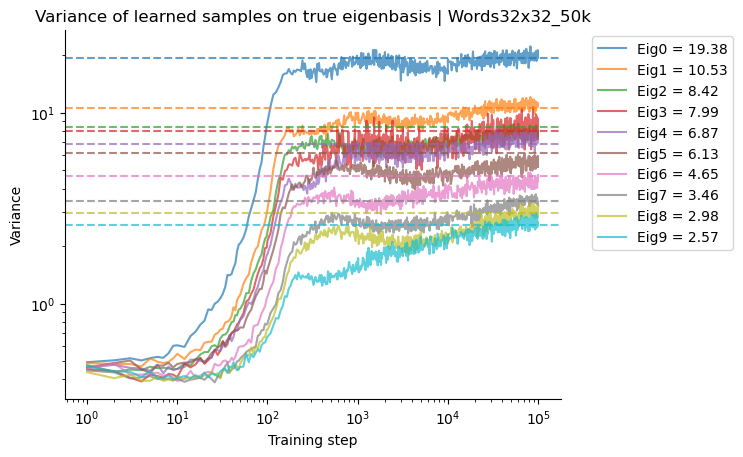

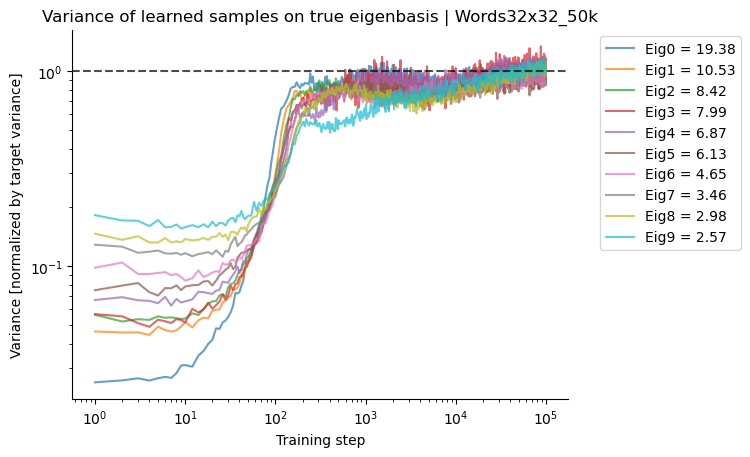

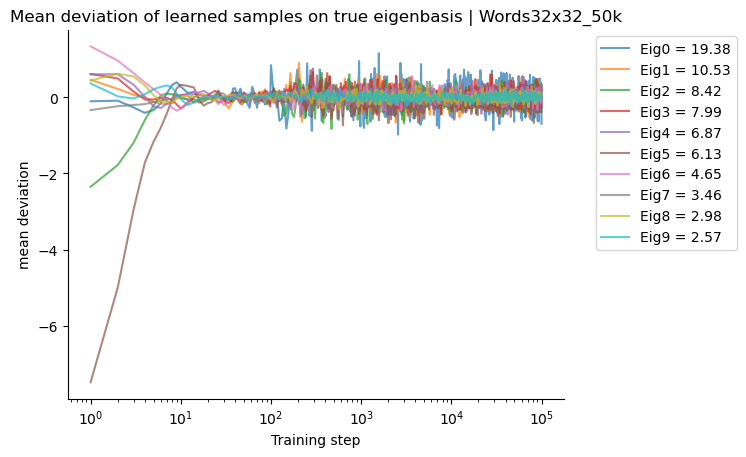

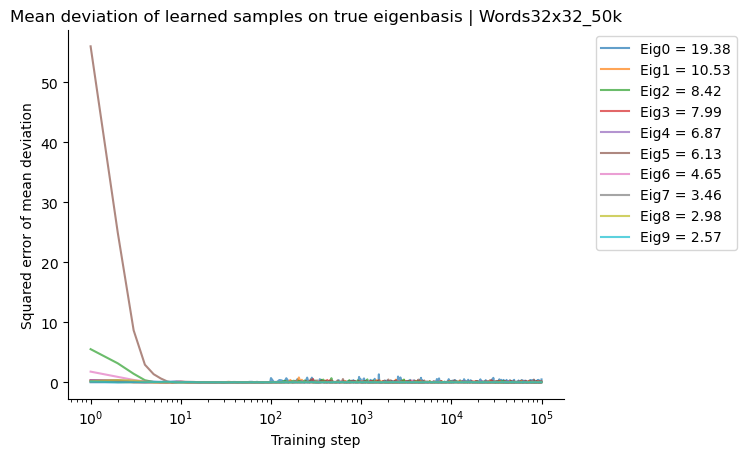

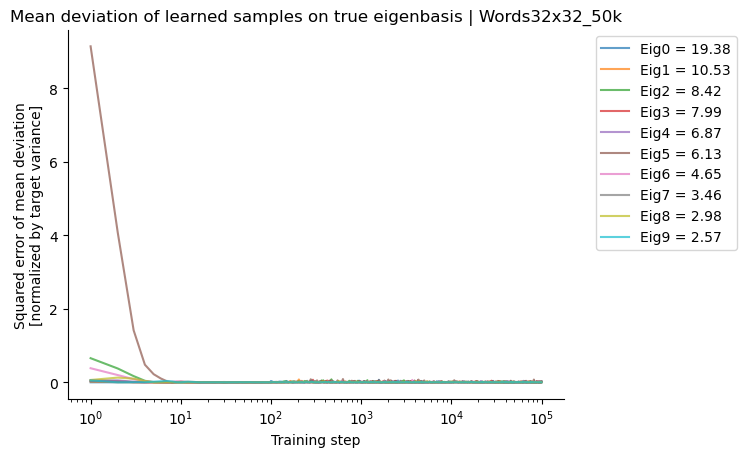

In [11]:
step_slice = sorted([*sample_store.keys()])
slice2plot = slice(None, 10, 1)
plot_sample_pnts_variance_trajectories(step_slice, diag_cov_x_sample_true_eigenbasis_traj, train_X_eigval.cpu(), slice2plot, figdir, dataset_name="Words32x32_50k")
plot_sample_pnts_mean_deviation_trajectories(step_slice, mean_x_sample_traj, train_X_mean.cpu(), train_X_eigvec.cpu(), train_X_eigval.cpu(), slice2plot, figdir, dataset_name="Words32x32_50k")

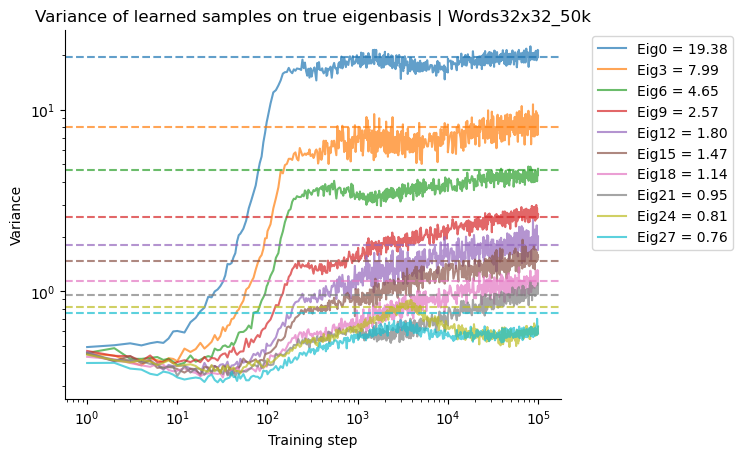

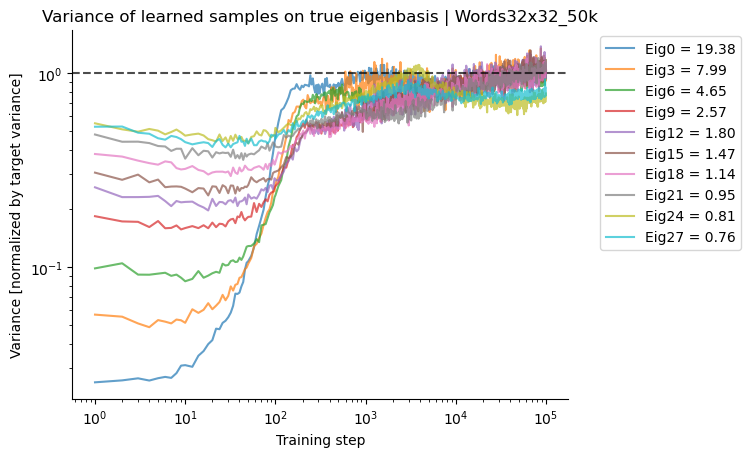

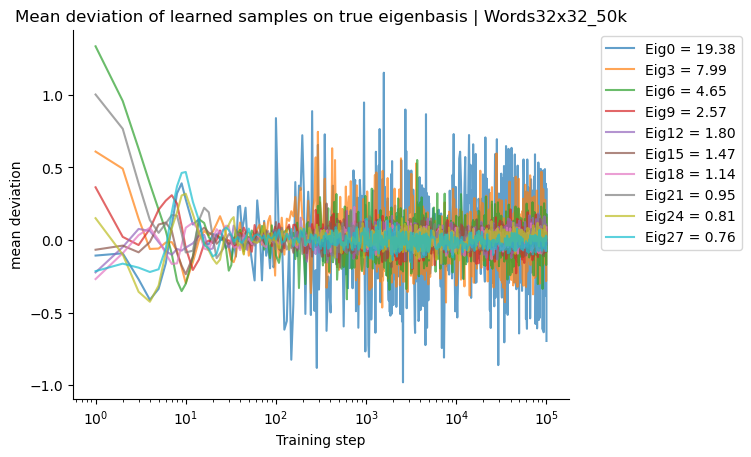

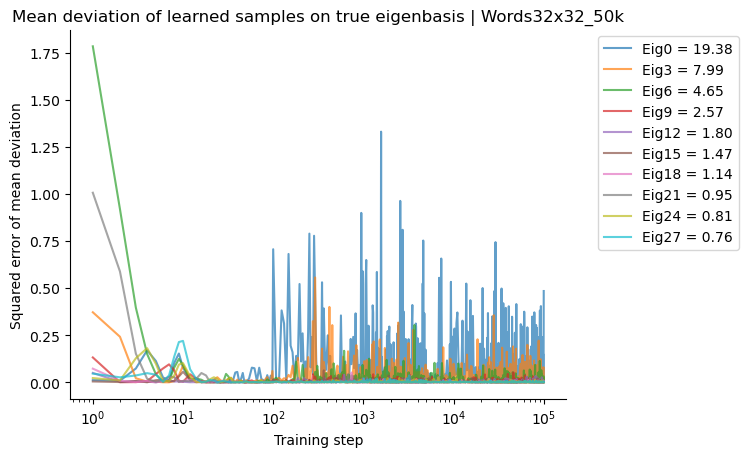

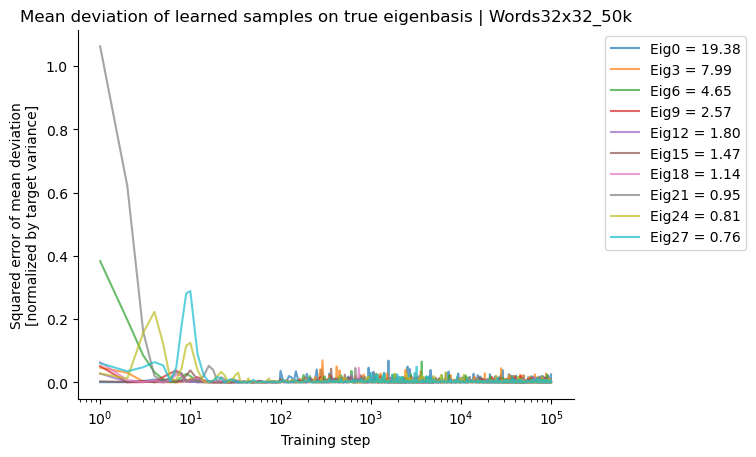

In [15]:
step_slice = sorted([*sample_store.keys()])
slice2plot = slice(None, 30, 3)
plot_sample_pnts_variance_trajectories(step_slice, diag_cov_x_sample_true_eigenbasis_traj, train_X_eigval.cpu(), slice2plot, figdir, dataset_name="Words32x32_50k")
plot_sample_pnts_mean_deviation_trajectories(step_slice, mean_x_sample_traj, train_X_mean.cpu(), train_X_eigvec.cpu(), train_X_eigval.cpu(), slice2plot, figdir, dataset_name="Words32x32_50k")

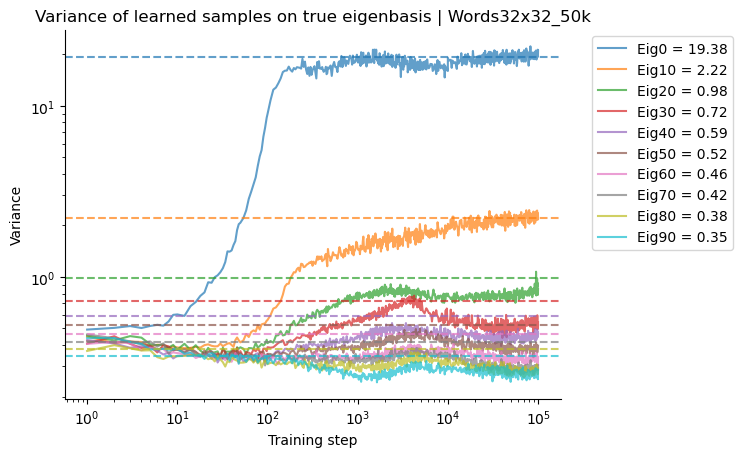

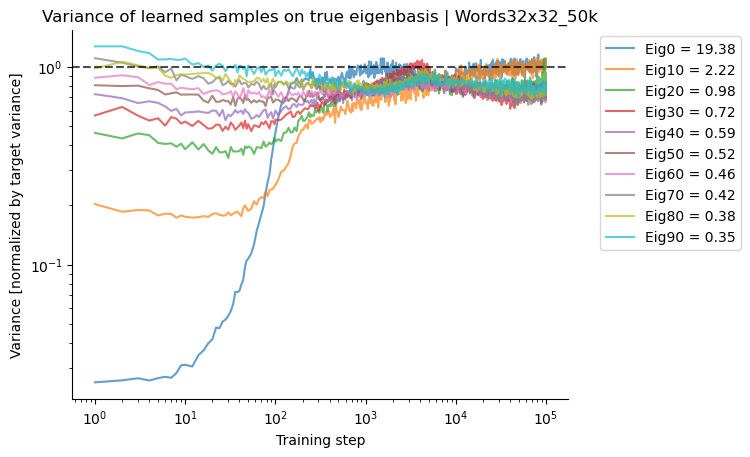

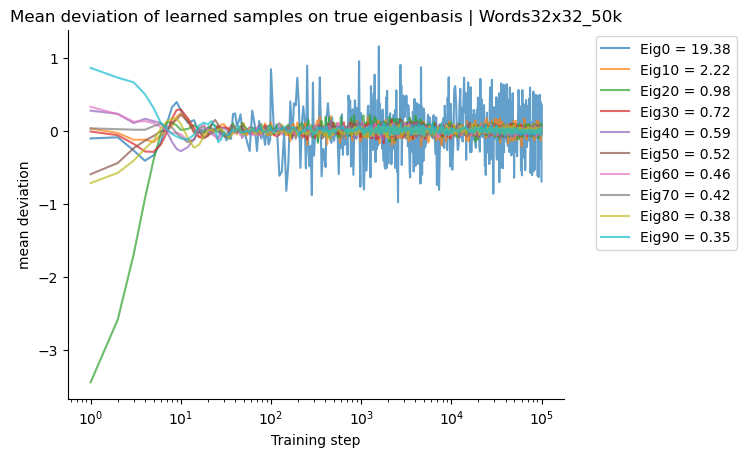

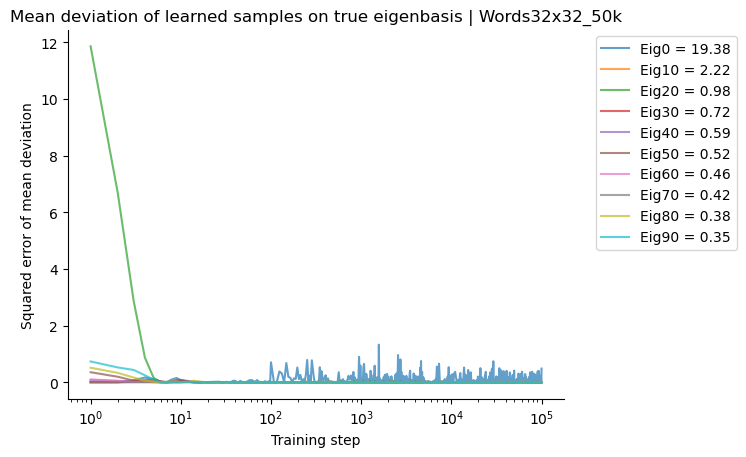

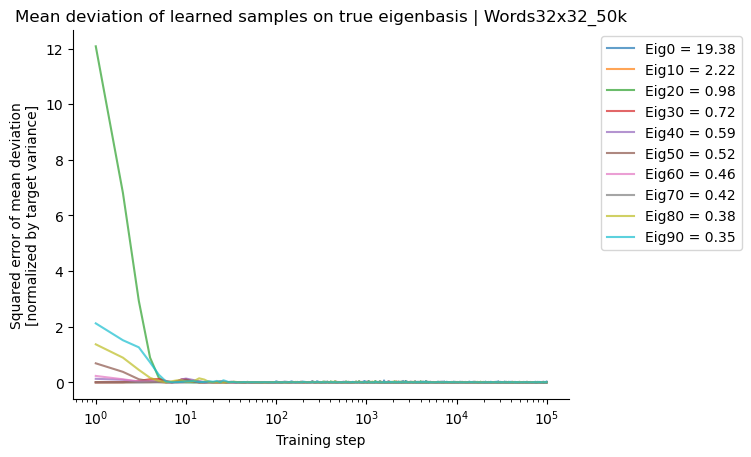

In [12]:
step_slice = sorted([*sample_store.keys()])
slice2plot = slice(None, 100, 10)
plot_sample_pnts_variance_trajectories(step_slice, diag_cov_x_sample_true_eigenbasis_traj, train_X_eigval.cpu(), slice2plot, figdir, dataset_name="Words32x32_50k")
plot_sample_pnts_mean_deviation_trajectories(step_slice, mean_x_sample_traj, train_X_mean.cpu(), train_X_eigvec.cpu(), train_X_eigval.cpu(), slice2plot, figdir, dataset_name="Words32x32_50k")

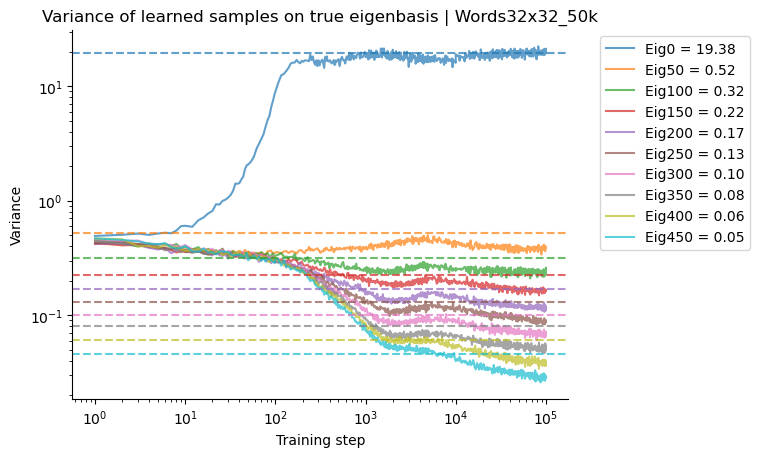

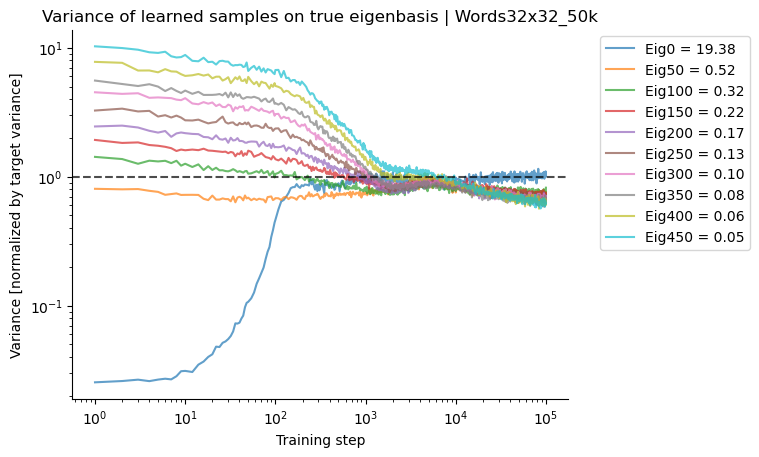

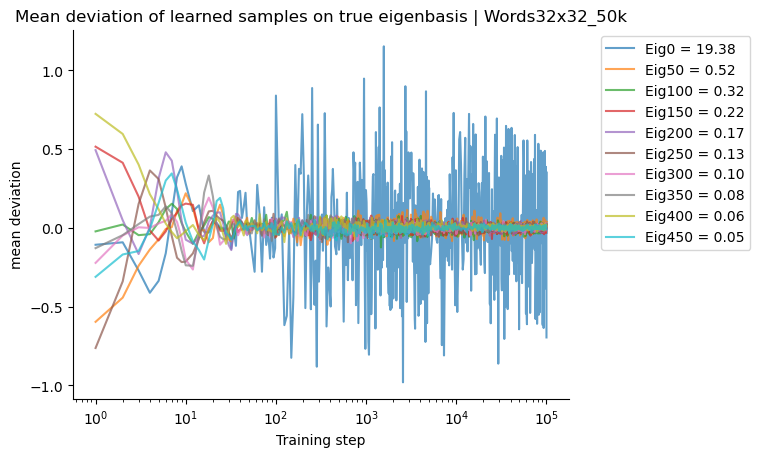

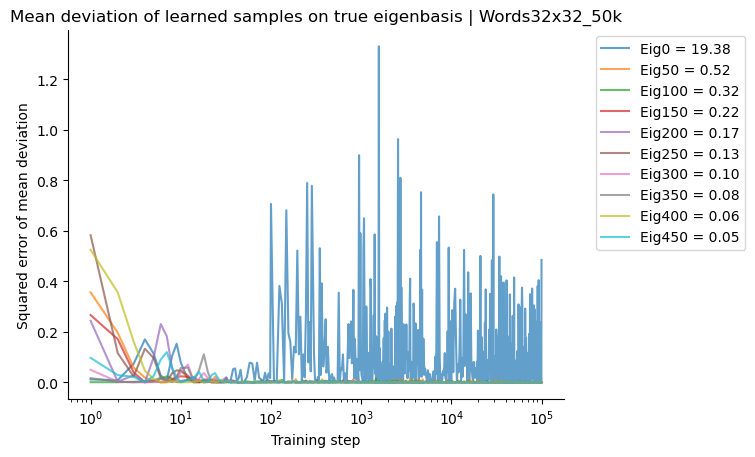

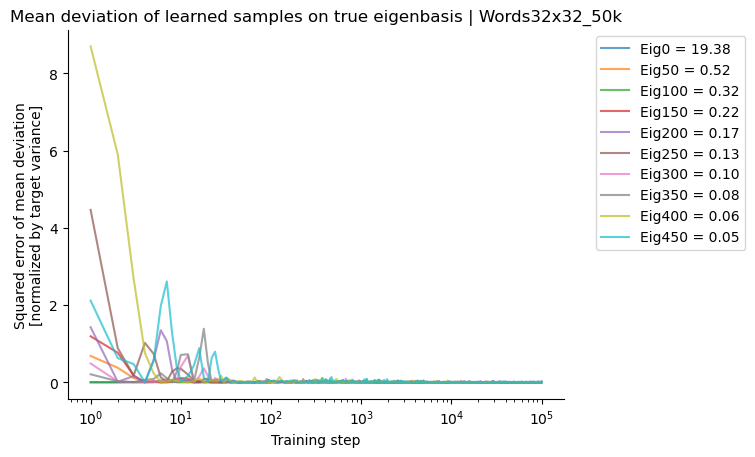

In [13]:
step_slice = sorted([*sample_store.keys()])
slice2plot = slice(None, 500, 50)
plot_sample_pnts_variance_trajectories(step_slice, diag_cov_x_sample_true_eigenbasis_traj, train_X_eigval.cpu(), slice2plot, figdir, dataset_name="Words32x32_50k")
plot_sample_pnts_mean_deviation_trajectories(step_slice, mean_x_sample_traj, train_X_mean.cpu(), train_X_eigvec.cpu(), train_X_eigval.cpu(), slice2plot, figdir, dataset_name="Words32x32_50k")

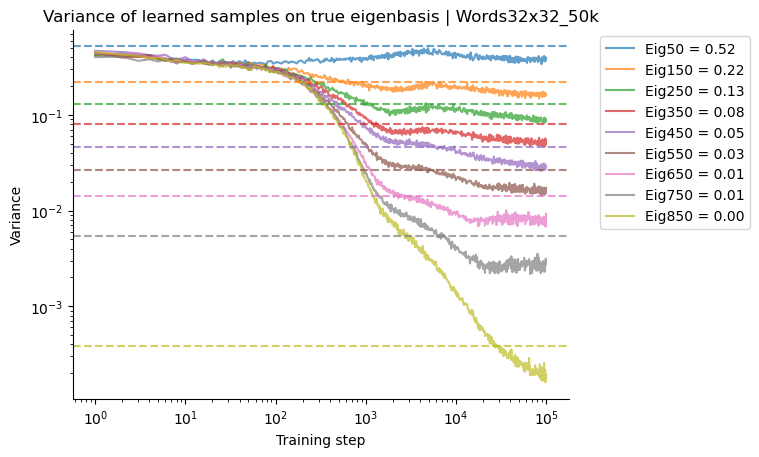

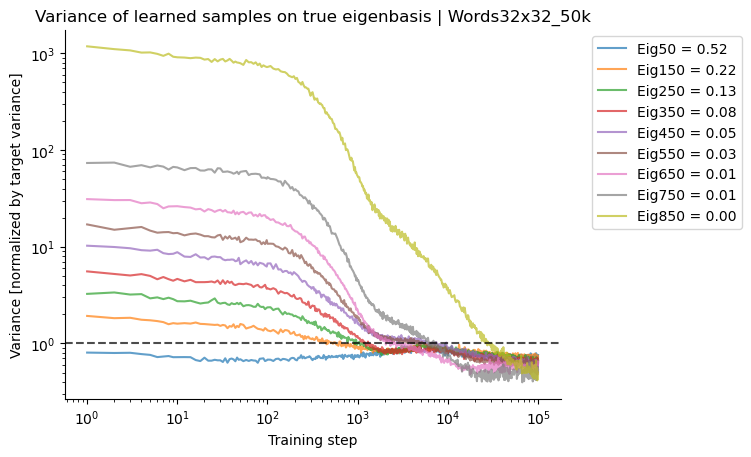

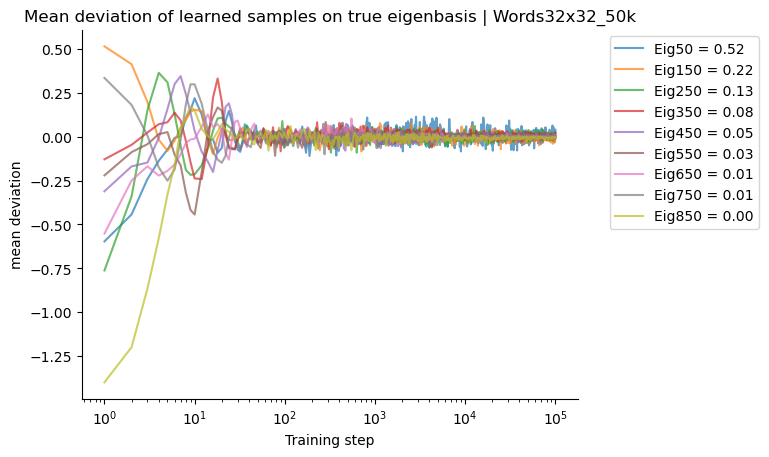

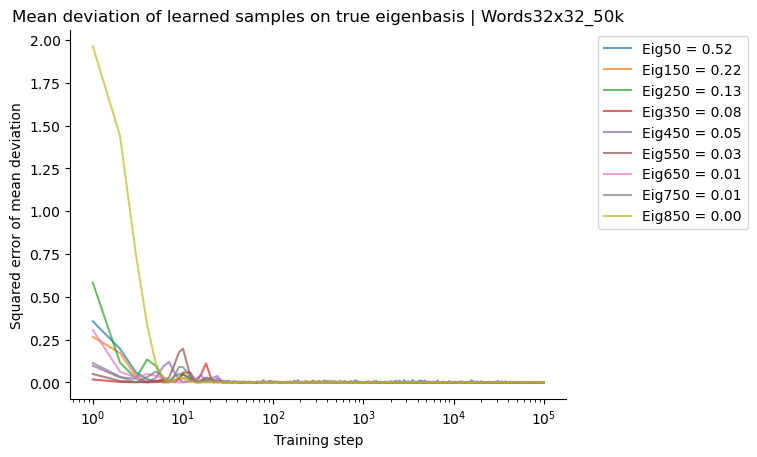

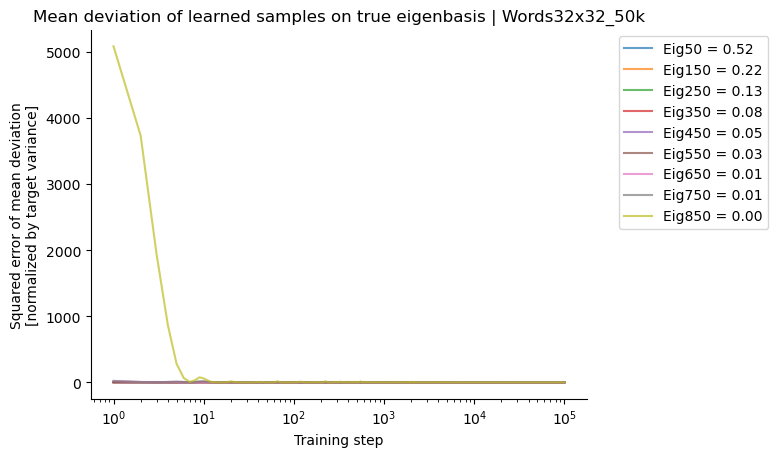

In [14]:
step_slice = sorted([*sample_store.keys()])
slice2plot = slice(50, 900, 100)
plot_sample_pnts_variance_trajectories(step_slice, diag_cov_x_sample_true_eigenbasis_traj, train_X_eigval.cpu(), slice2plot, figdir, dataset_name="Words32x32_50k")
plot_sample_pnts_mean_deviation_trajectories(step_slice, mean_x_sample_traj, train_X_mean.cpu(), train_X_eigvec.cpu(), train_X_eigval.cpu(), slice2plot, figdir, dataset_name="Words32x32_50k")

In [ ]:
train_X_mean, train_X_cov, train_X_eigval, train_X_eigvec, mean_x_sample_traj, cov_x_sample_traj, diag_cov_x_sample_true_eigenbasis_traj = \
    process_pnts_mean_cov_statistics(pnts, sample_store, expdir, device="cuda")

In [23]:
diag_cov_x_sample_true_eigenbasis_traj[0].mean()

tensor(0.4335)

No crossing found for mode 42
No crossing found for mode 54
No crossing found for mode 55
No crossing found for mode 57
No crossing found for mode 58
No crossing found for mode 59
No crossing found for mode 60
No crossing found for mode 61
No crossing found for mode 65
No crossing found for mode 867
No crossing found for mode 868
No crossing found for mode 869
No crossing found for mode 870
No crossing found for mode 871
No crossing found for mode 872
No crossing found for mode 873
No crossing found for mode 874
No crossing found for mode 875
No crossing found for mode 876
No crossing found for mode 877
No crossing found for mode 878
No crossing found for mode 879
No crossing found for mode 880
No crossing found for mode 881
No crossing found for mode 882
No crossing found for mode 883
No crossing found for mode 884
No crossing found for mode 885
No crossing found for mode 886
No crossing found for mode 887
No crossing found for mode 888
No crossing found for mode 889
No crossing found

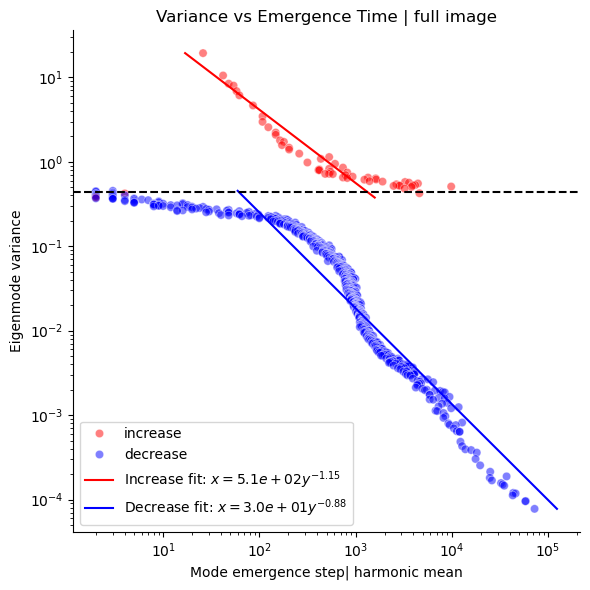

In [44]:
# convergence speed 
df = compute_crossing_points(train_X_eigval, diag_cov_x_sample_true_eigenbasis_traj, step_slice, smooth_sigma=0.1, threshold_type="harmonic_mean", )
df.to_csv(f"{figdir}/synopsis_full_image_eigenmode_emergence_harmonic_mean_vs_variance.csv", index=False)
figh = analyze_and_plot_variance(df, x_col='emergence_step', y_col='Variance', 
            hue_col='Direction', palette={"increase": "red", "decrease": "blue"}, 
            log_x=True, log_y=True, figsize=(6, 6), fit_label_format='{direction} fit: $x = {a:.1e}y^{{{b:.2f}}}$', 
            reverse_equation=True, annotate=False, annotate_offset=(0, 0), title=f'Variance vs Emergence Time | full image', 
            xlabel='Mode emergence step| harmonic mean', ylabel='Eigenmode variance', alpha=0.5, fit_line_kwargs=None, scatter_kwargs=None, ax=None)
figh.gca().axhline(diag_cov_x_sample_true_eigenbasis_traj[0].mean(), color="black", linestyle="--")
saveallforms(figdir, "full_image_eigenmode_emergence_harmonic_mean_vs_variance", plt.gcf())
figh.show()

No crossing found for mode 42
No crossing found for mode 54
No crossing found for mode 55
No crossing found for mode 57
No crossing found for mode 58
No crossing found for mode 59
No crossing found for mode 60
No crossing found for mode 61
No crossing found for mode 65
No crossing found for mode 893
No crossing found for mode 894
No crossing found for mode 895
No crossing found for mode 896
No crossing found for mode 897
No crossing found for mode 898
No crossing found for mode 899
No crossing found for mode 900
No crossing found for mode 901
No crossing found for mode 902
No crossing found for mode 903
No crossing found for mode 904
No crossing found for mode 905
No crossing found for mode 906
No crossing found for mode 907
No crossing found for mode 908
No crossing found for mode 909
No crossing found for mode 910
No crossing found for mode 911
No crossing found for mode 912
No crossing found for mode 913
No crossing found for mode 914
No crossing found for mode 915
No crossing found

/n/home12/binxuwang/Github/DiffusionLearningCurve/core/trajectory_convergence_lib.py:112: RuntimeWarning: invalid value encountered in sqrt
  threshold = np.sqrt(target_eigval[i] * trajectory[0])


Not enough data points to fit for direction: nan


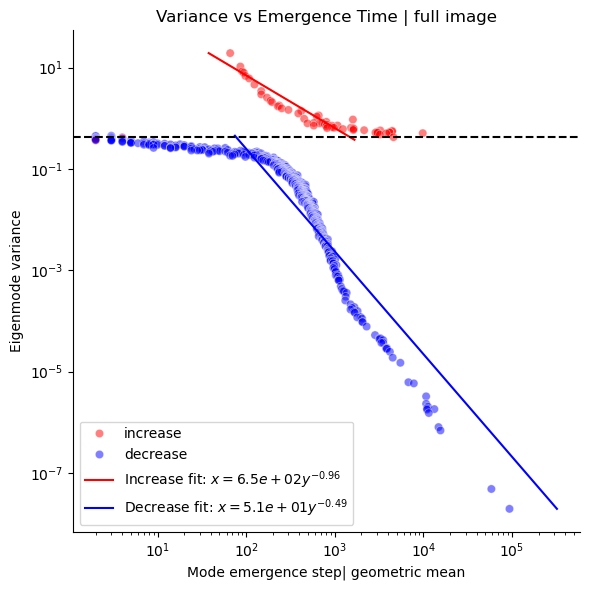

In [43]:
# convergence speed 
df = compute_crossing_points(train_X_eigval.cpu(), diag_cov_x_sample_true_eigenbasis_traj.cpu(), step_slice, smooth_sigma=0.1, threshold_type="geometric_mean", )
df.to_csv(f"{figdir}/synopsis_full_image_eigenmode_emergence_geometric_mean_vs_variance.csv", index=False)
figh = analyze_and_plot_variance(df, x_col='emergence_step', y_col='Variance', 
            hue_col='Direction', palette={"increase": "red", "decrease": "blue"}, 
            log_x=True, log_y=True, figsize=(6, 6), fit_label_format='{direction} fit: $x = {a:.1e}y^{{{b:.2f}}}$', 
            reverse_equation=True, annotate=False, annotate_offset=(0, 0), title=f'Variance vs Emergence Time | full image', 
            xlabel='Mode emergence step| geometric mean', ylabel='Eigenmode variance', alpha=0.5, fit_line_kwargs=None, scatter_kwargs=None, ax=None)
figh.gca().axhline(diag_cov_x_sample_true_eigenbasis_traj[0].mean(), color="black", linestyle="--", label="initial variance")
saveallforms(figdir, "full_image_eigenmode_emergence_geometric_mean_vs_variance", plt.gcf())
figh.show() 

In [ ]:
loss_store = pkl.load(open(join(expdir, "loss_store.pkl"), "rb"))

In [34]:
# # compute KL divergence between two Gaussians 
# import torch

# def kl_gaussian_torch(mu0: torch.Tensor,
#                       cov0: torch.Tensor,
#                       mu1: torch.Tensor,
#                       cov1: torch.Tensor,
#                       eps: float = 1e-6,
#                       device="cpu") -> torch.Tensor:
#     """
#     Compute KL(N(mu0,cov0) || N(mu1,cov1)) for multivariate Gaussians.

#     Args:
#         mu0:  (..., d) tensor of means for P
#         cov0: (..., d, d) tensor of covariances for P
#         mu1:  (..., d) tensor of means for Q
#         cov1: (..., d, d) tensor of covariances for Q

#     Returns:
#         (...,) tensor of KL divergences
#     """
#     d = mu0.size(-1)
#     inv_cov1 = torch.linalg.inv(cov1 + eps * torch.eye(d, device=device))
#     trace_term = torch.einsum("...ii->...", inv_cov1 @ cov0)
#     diff = (mu1 - mu0).unsqueeze(-2)
#     quadratic = torch.einsum("...ij,...jk,...ki->...", diff, inv_cov1, diff.transpose(-2,-1))
#     logdet = torch.logdet(cov1) - torch.logdet(cov0)
#     return 0.5 * (trace_term + quadratic - d + logdet)


import torch

def kl_gaussian_torch(mu0: torch.Tensor,
                      cov0: torch.Tensor,
                      mu1: torch.Tensor,
                      cov1: torch.Tensor,
                      eps: float = 1e-6) -> torch.Tensor:
    """
    Numerically‑stable KL(N(mu0,cov0) || N(mu1,cov1)).

    Args:
        mu0:  (..., d)
        cov0: (..., d, d)
        mu1:  (..., d)
        cov1: (..., d, d)
        eps:  float added to diag for stability

    Returns:
        (...,) KL divergence
    """
    d = mu0.size(-1)
    # ensure positive‑definite
    cov0 = cov0 + eps * torch.eye(d, device=cov0.device)
    cov1 = cov1 + eps * torch.eye(d, device=cov1.device)

    inv_cov1 = torch.linalg.inv(cov1)
    trace_term = torch.einsum("...ii->...", inv_cov1 @ cov0)

    diff = (mu1 - mu0).unsqueeze(-2)
    quad_term = torch.einsum("...ij,...jk,...ki->...", diff, inv_cov1, diff.transpose(-2,-1))

    sign1, logdet1 = torch.linalg.slogdet(cov1)
    sign0, logdet0 = torch.linalg.slogdet(cov0)
    logdet_term = logdet1 - logdet0

    return 0.5 * (trace_term + quad_term - d + logdet_term)

In [37]:
KL_trace = kl_gaussian_torch(train_X_mean.cpu(), train_X_cov.cpu(), mean_x_sample_traj, cov_x_sample_traj, eps=1e-5)

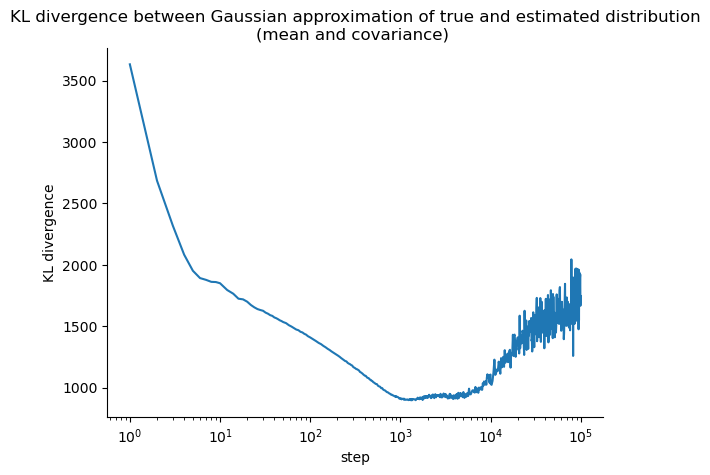

In [42]:
plt.figure()
plt.plot(step_slice, KL_trace)
plt.xscale("log")
# plt.yscale("log")
plt.ylabel("KL divergence")
plt.xlabel("step")
plt.title(f"KL divergence between Gaussian approximation of true and estimated distribution\n(mean and covariance) ")
saveallforms(figdir, "KL_learn_trace_mean_cov", plt.gcf())
plt.show()